# Data Collection

In [2]:
! pip install chembl_webresource_client

     |████████████████████████████████| 55 kB 3.1 MB/s 
     |████████████████████████████████| 596 kB 15.5 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: itsdangerous
    Found existing installation: itsdangerous 1.1.0
    Uninstalling itsdangerous-1.1.0:
      Successfully uninstalled itsdangerous-1.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires itsdangerous<2.0,>=0.24, but you have itsdangerous 2.1.2 which is incompatible.


In [3]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [92]:
target = new_client.target
target_query = target.search('EGFR') # Selecting EGFR molecules from the database
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q01279', 'xref_name': None, 'xre...",Mus musculus,Epidermal growth factor receptor erbB1,16.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,11.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,9.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
6,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,7.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,Baculoviral IAP repeat-containing protein 2/Ep...,7.0,False,CHEMBL4802031,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
8,[],Homo sapiens,Epidermal growth factor receptor,5.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606


In [90]:
selected_target = targets.target_chembl_id[3] # ID corresponding to 'homo sapiens' and 'SINGLE PROTEIN'
selected_target

'CHEMBL203'

In [91]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50") # Selecting IC50 as standard type

In [93]:
df = pd.DataFrame.from_dict(res)

In [94]:
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15258,Not Active,23070040,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4509084,EGFR kinase inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,20.0
15259,None,23090818,[],CHEMBL4510669,"Protein Tyrosine Kinase, EGF Receptor Eurofins...",B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,4.59
15260,None,23116071,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512500,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,None,None,6.0
15261,None,23116480,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512213,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,None,None,6.0


In [95]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()] # Removing missing values
df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15258,Not Active,23070040,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4509084,EGFR kinase inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,20.0
15259,None,23090818,[],CHEMBL4510669,"Protein Tyrosine Kinase, EGF Receptor Eurofins...",B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,4.59
15260,None,23116071,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512500,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,None,None,6.0
15261,None,23116480,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512213,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,None,None,6.0


In [10]:
len(df2.canonical_smiles.unique())

8915

In [96]:
df2_nr = df2.drop_duplicates(['canonical_smiles']) # Removing duplicates
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
6,None,32680,[],CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,9.3
7,None,32770,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,500.0
8,None,32772,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15258,Not Active,23070040,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4509084,EGFR kinase inhibition assay,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,20.0
15259,None,23090818,[],CHEMBL4510669,"Protein Tyrosine Kinase, EGF Receptor Eurofins...",B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,µM,None,None,4.59
15260,None,23116071,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512500,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,None,None,6.0
15261,None,23116480,"[{'comments': None, 'relation': None, 'result_...",CHEMBL4512213,EGFR(EGFRMGB1) Takeda global kinase panel,B,None,None,BAO_0000179,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,pIC50,None,None,None,6.0


In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0
...,...,...,...
15258,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.0
15259,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59
15260,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.0
15261,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.0


In [13]:
df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)

In [14]:
df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [97]:
bioactivity_threshold = [] #Classifying based on 'IC50' value 
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...
8910,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
8911,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
8912,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
8913,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


In [17]:
df_no_smiles = df5.drop(columns='canonical_smiles')

In [18]:
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL68920,41.00,active
1,CHEMBL69960,170.00,active
2,CHEMBL137635,9300.00,intermediate
3,CHEMBL306988,500000.00,inactive
4,CHEMBL66879,3000000.00,inactive
...,...,...,...
8910,CHEMBL4520788,20.00,active
8911,CHEMBL1800685,4.59,active
8912,CHEMBL4088216,1000.00,active
8913,CHEMBL4549667,1000.00,active


In [19]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-05-03 00:07:01--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M  62.2MB/s    in 1.3s    

2022-05-03 00:07:02 (62.2 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37

In [20]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [100]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False): #Lipinski's descriptors

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [22]:
df_lipinski = lipinski(df5.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,369.432,4.77200,1.0,6.0
3,283.287,2.31056,2.0,4.0
4,164.160,1.49000,2.0,2.0
...,...,...,...,...
8910,448.592,5.57642,2.0,7.0
8911,475.510,7.35780,2.0,2.0
8912,402.454,2.35370,0.0,5.0
8913,481.350,3.11620,0.0,5.0


In [23]:
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...
8910,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active
8911,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active
8912,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active
8913,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active


In [24]:
df_combined = pd.concat([df5,df_lipinski], axis=1)

In [25]:
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active,383.814,4.45034,3.0,4.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active,482.903,3.61432,3.0,6.0
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate,369.432,4.77200,1.0,6.0
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive,283.287,2.31056,2.0,4.0
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive,164.160,1.49000,2.0,2.0
...,...,...,...,...,...,...,...,...
8910,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,20.00,active,448.592,5.57642,2.0,7.0
8911,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,4.59,active,475.510,7.35780,2.0,2.0
8912,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,1000.00,active,402.454,2.35370,0.0,5.0
8913,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,1000.00,active,481.350,3.11620,0.0,5.0


In [26]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [27]:
df_combined.standard_value.describe()

count    8.915000e+03
mean     3.082816e+04
std      6.830176e+05
min      3.000000e-03
25%      3.300000e+01
50%      3.660000e+02
75%      6.881500e+03
max      5.500000e+07
Name: standard_value, dtype: float64

In [30]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [31]:
df_norm = norm_value(df_combined)
df_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,41.00
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,170.00
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,9300.00
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,500000.00
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,3000000.00
...,...,...,...,...,...,...,...,...
8910,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,20.00
8911,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,4.59
8912,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,1000.00
8913,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,1000.00


In [32]:
df_norm.standard_value_norm.describe()

count    8.915000e+03
mean     3.082816e+04
std      6.830176e+05
min      3.000000e-03
25%      3.300000e+01
50%      3.660000e+02
75%      6.881500e+03
max      5.500000e+07
Name: standard_value_norm, dtype: float64

In [33]:
df_final = pIC50(df_norm)
df_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...
8910,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,7.698970
8911,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,8.338187
8912,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
8913,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [34]:
df_final.pIC50.describe()

count    8915.000000
mean        6.433292
std         1.479546
min         1.259637
25%         5.162318
50%         6.436519
75%         7.481486
max        11.522879
Name: pIC50, dtype: float64

In [35]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [99]:
df_2class = df_final[df_final['class'] != 'intermediate'] #Considering only active and intermediate for EDA
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
5,CHEMBL77085,N#CC(C#N)=Cc1cc(O)ccc1[N+](=O)[O-],inactive,215.168,1.73096,1.0,5.0,4.017729
...,...,...,...,...,...,...,...,...
8910,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,7.698970
8911,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,8.338187
8912,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
8913,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [37]:
df_2class.to_csv('acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv') 

#EDA

In [38]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

Frequency of different classes

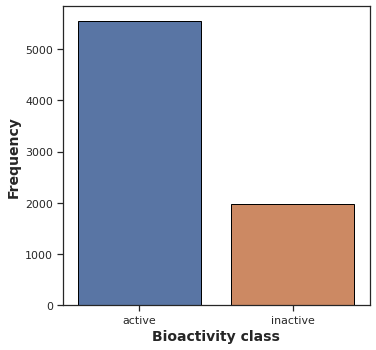

In [39]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

Molecular Weight vs logP

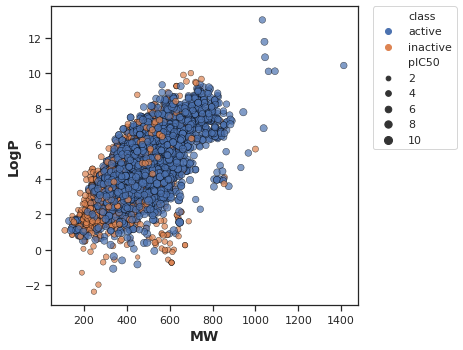

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

Boxplot

Bioactivity Class vs 'pIC50' value

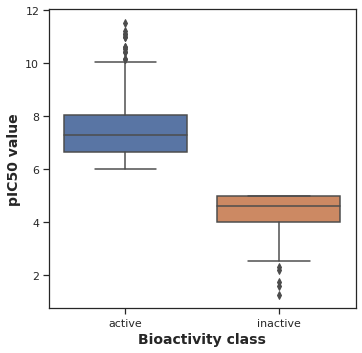

In [41]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

Bioactivity Class vs Molecular Weight

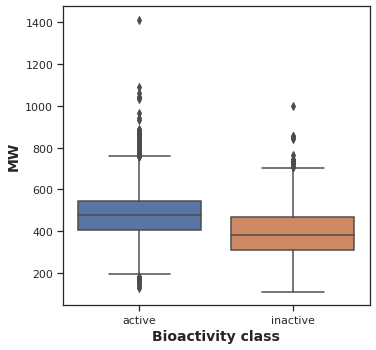

In [42]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

Bioactivity Class vs 'log p' value

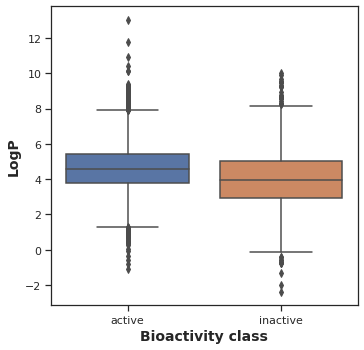

In [43]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

Bioactivity Class vs No of H Bond Donors

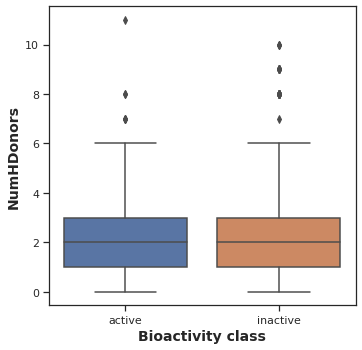

In [44]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

Bioactivity Class vs No of H Bond Acceptors

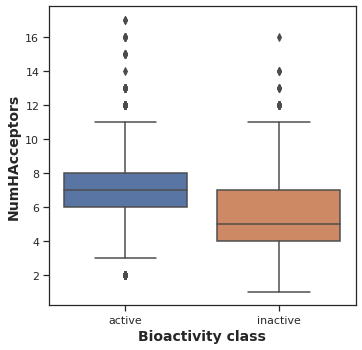

In [45]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

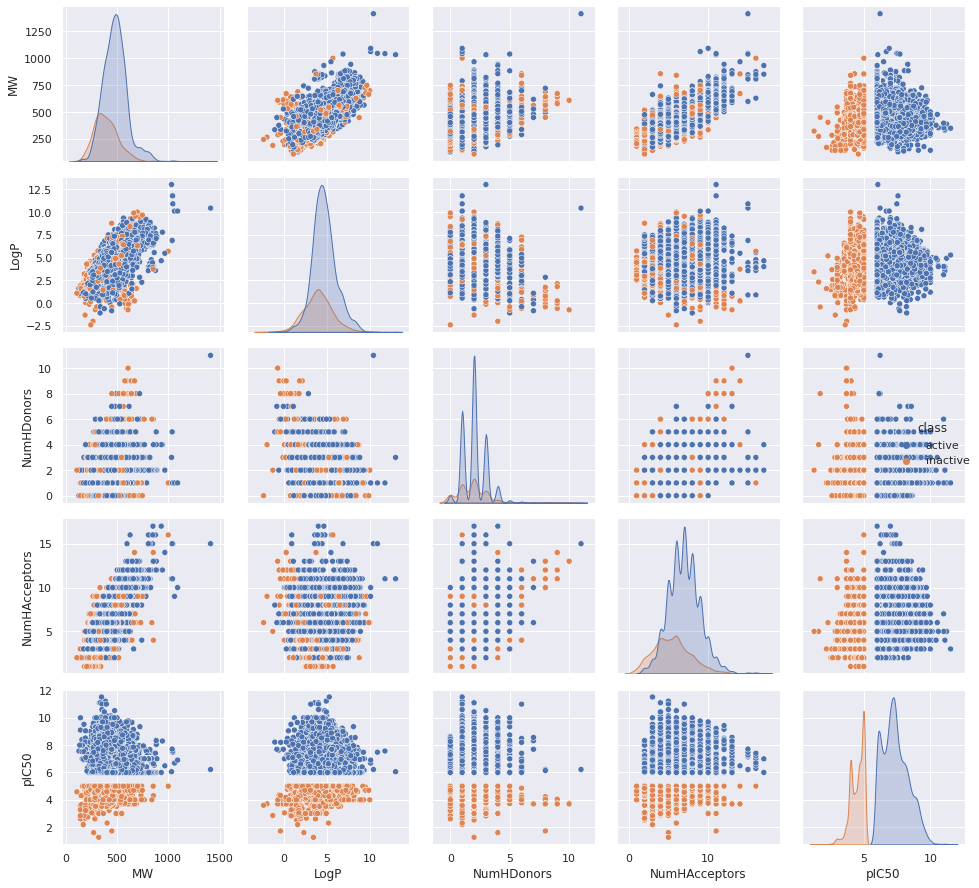

In [143]:
selection = ['class','MW','LogP','NumHDonors','NumHAcceptors','pIC50']
sns.pairplot(df_2class[selection], hue='class')
plt.tight_layout()
plt.savefig('Pairplot.png',dpi=300)

# Molecular Fingerprint Calculation

PaDEL Descriptor for Fingerprint Calculation

In [47]:
! unzip "padel.zip"

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [48]:
! ls -l

total 112504
-rw-r--r-- 1 root root   666959 May  3 00:06 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  1250192 May  3 00:08 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root  1051364 May  3 00:08 acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
drwxr-xr-x 3 root root     4096 May  3 00:08 __MACOSX
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 May  3 00:08 padel.sh
-rw-r--r-- 1 root root 25768637 May  3 00:08 padel.zip
-rw-r--r-- 1 root root    13792 May  3 00:08 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    15258 May  3 00:08 plot_ic50.pdf
-rw-r--r-- 1 root root    15784 May  3 00:08 plot_LogP.pdf
-rw-r--r-- 1 root root    14408 May  3 00:08 plot_MW.pdf
-rw-r--r-- 1 root root  1283198 May  3 00:08 plot_MW_vs_LogP.pdf
-rw-r--r-- 1 root root    15221 May  3 00:08 plot_NumHAcce

In [101]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [102]:
df3

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
3,3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...,...
8910,8910,CHEMBL4520788,CNCc1ccccc1-c1csc([C@H](C)Nc2nc(C)nc3cc(OC)c(O...,active,448.592,5.57642,2.0,7.0,7.698970
8911,8911,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,active,475.510,7.35780,2.0,2.0,8.338187
8912,8912,CHEMBL4088216,CN1C(=O)[C@@H](N2CCc3cn(Cc4ccccc4)nc3C2=O)COc2...,active,402.454,2.35370,0.0,5.0,6.000000
8913,8913,CHEMBL4549667,CN1C(=O)[C@@H](N2CCc3c(nn(Cc4ccccc4)c3Br)C2=O)...,active,481.350,3.11620,0.0,5.0,6.000000


In [51]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

Depiction of molecular formulae

In [52]:
! cat molecule.smi | head -5

Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1	CHEMBL68920
Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21	CHEMBL69960
CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12	CHEMBL137635
CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1	CHEMBL306988
O=C(O)/C=C/c1ccc(O)cc1	CHEMBL66879


Total number of molecules

In [53]:
! cat molecule.smi | wc -l

8915


In [54]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


Execute padel desciptor commands for conversion

In [55]:
! bash padel.sh

Streaming output truncated to the last 5000 lines.
Processing CHEMBL1830266 in molecule.smi (3918/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830265 in molecule.smi (3917/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830268 in molecule.smi (3920/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830267 in molecule.smi (3919/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830270 in molecule.smi (3922/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830269 in molecule.smi (3921/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830272 in molecule.smi (3924/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830271 in molecule.smi (3923/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830274 in molecule.smi (3926/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830273 in molecule.smi (3925/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830276 in molecule.smi (3928/8915). Average speed: 0.22 s/mol.
Processing CHEMBL1830275 in molecule.smi (3927/8915). Aver

In [56]:
! ls -l

total 128592
-rw-r--r-- 1 root root   666959 May  3 00:06 acetylcholinesterase_02_bioactivity_data_preprocessed.csv
-rw-r--r-- 1 root root  1250192 May  3 00:08 acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv
-rw-r--r-- 1 root root  1051364 May  3 00:08 acetylcholinesterase_05_bioactivity_data_2class_pIC50.csv
-rw-r--r-- 1 root root 15858083 May  3 00:43 descriptors_output.csv
drwxr-xr-x 3 root root     4096 May  3 00:08 __MACOSX
-rwxr-xr-x 1 root root 85055499 Mar 11  2020 Miniconda3-py37_4.8.2-Linux-x86_64.sh
-rw-r--r-- 1 root root   611136 May  3 00:09 molecule.smi
drwxrwxr-x 4 root root     4096 May 30  2020 PaDEL-Descriptor
-rw-r--r-- 1 root root      231 May  3 00:08 padel.sh
-rw-r--r-- 1 root root 25768637 May  3 00:08 padel.zip
-rw-r--r-- 1 root root    13792 May  3 00:08 plot_bioactivity_class.pdf
-rw-r--r-- 1 root root    15258 May  3 00:08 plot_ic50.pdf
-rw-r--r-- 1 root root    15784 May  3 00:08 plot_LogP.pdf
-rw-r--r-- 1 root root    14408 May  3 00:08 plot_MW.p

In [103]:
df3_X = pd.read_csv('descriptors_output.csv')

In [107]:
df3_X # canonical formula converted to molecular fingerprint

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL68920,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL69960,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL306988,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL66879,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL137635,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,CHEMBL4520788,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8911,CHEMBL4088216,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8912,CHEMBL4549667,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8913,CHEMBL1800685,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8911,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8912,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8913,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df3_Y = df3['pIC50']
df3_Y

0       7.387216
1       6.769551
2       5.031517
3       3.301030
4       2.522879
          ...   
8910    7.698970
8911    8.338187
8912    6.000000
8913    6.000000
8914    6.000000
Name: pIC50, Length: 8915, dtype: float64

In [61]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.769551
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.031517
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.301030
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.698970
8911,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.338187
8912,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
8913,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


In [105]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [108]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [109]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8915 entries, 0 to 8914
Columns: 882 entries, PubchemFP0 to pIC50
dtypes: float64(1), int64(881)
memory usage: 60.0 MB


In [66]:
df.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
count,8915.000000,8915.000000,8915.000000,8915.000000,8915.0,8915.0,8915.000000,8915.0,8915.0,8915.000000,...,8915.0,8915.0,8915.0,8915.0,8915.0,8915.0,8915.0,8915.0,8915.0,8915.000000
mean,0.999663,0.990017,0.793270,0.139764,0.0,0.0,0.001907,0.0,0.0,0.999888,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.433292
std,0.018342,0.099421,0.404983,0.346762,0.0,0.0,0.043629,0.0,0.0,0.010591,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.479546
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.259637
25%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.162318
50%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.436519
75%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.481486
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.522879


In [111]:
df.corr()['pIC50']

PubchemFP0      0.005022
PubchemFP1      0.091460
PubchemFP2      0.156230
PubchemFP3      0.076081
PubchemFP4           NaN
                  ...   
PubchemFP877         NaN
PubchemFP878         NaN
PubchemFP879         NaN
PubchemFP880         NaN
pIC50           1.000000
Name: pIC50, Length: 882, dtype: float64

# Feature Engineering and Model Building

In [112]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8911,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8912,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8913,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [113]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8910,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8911,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8912,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8913,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [114]:
Y = df.pIC50
Y

0       7.387216
1       6.769551
2       5.031517
3       3.301030
4       2.522879
          ...   
8910    7.698970
8911    8.338187
8912    6.000000
8913    6.000000
8914    6.000000
Name: pIC50, Length: 8915, dtype: float64

In [115]:
X.shape

(8915, 881)

In [116]:
Y.shape

(8915,)

## Variance Threshold

In [117]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)

In [118]:
X.shape

(8915, 148)

In [119]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [120]:
X_train.shape, Y_train.shape

((7132, 148), (7132,))

In [121]:
X_test.shape, Y_test.shape

((1783, 148), (1783,))

## Random Forest Regressor

In [77]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=200, max_depth = 100, random_state=123 )
RF_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=100, n_estimators=200, random_state=123)

In [122]:
Y_pred = RF_model.predict(X_test)

In [124]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
RMSE = math.sqrt(mean_squared_error(Y_test, Y_pred))
MAE = mean_absolute_error(Y_test, Y_pred)
print('RMSE for Random Forest =',RMSE)
print('MAE for Random Forest = ',MAE)

RMSE for Random Forest = 0.6337539997104871
MAE for Random Forest =  0.40901073675441635


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

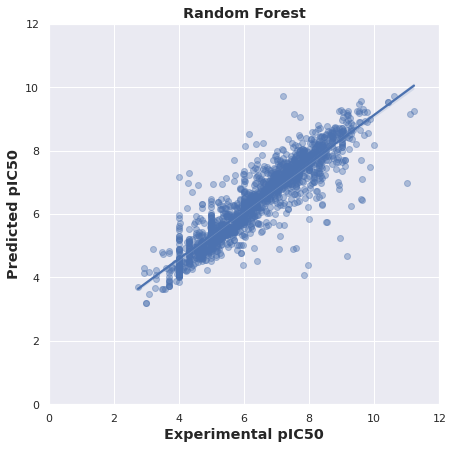

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)


ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(7, 7)
ax.set_title('Random Forest',fontsize='large', fontweight='bold')
plt.show

## Bagging Regressor

In [126]:
from sklearn.ensemble import BaggingRegressor
Bag_model = BaggingRegressor(n_estimators=200, random_state=123)
Bag_model.fit(X_train, Y_train)

BaggingRegressor(n_estimators=200, random_state=123)

In [127]:
Y_pred = Bag_model.predict(X_test)

In [128]:
RMSE = math.sqrt(mean_squared_error(Y_test, Y_pred))
MAE = mean_absolute_error(Y_test, Y_pred)
print('RMSE for Bagging =',RMSE)
print('MAE for Bagging = ',MAE)

RMSE for Bagging = 1.0479392151576445
MAE for Bagging =  0.7363441131668378


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

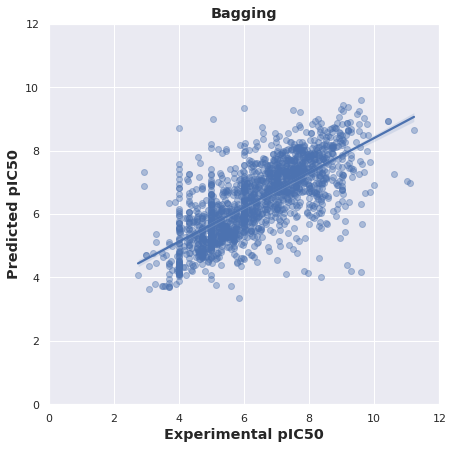

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)


ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(7, 7)
ax.set_title('Bagging',fontsize='large', fontweight='bold')
plt.show

## AdaBoost Regressor

In [130]:
from sklearn.ensemble import AdaBoostRegressor
ABR_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=123)
ABR_model.fit(X_train, Y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=123)

In [131]:
Y_pred = ABR_model.predict(X_test)

In [132]:
RMSE = math.sqrt(mean_squared_error(Y_test, Y_pred))
MAE = mean_absolute_error(Y_test, Y_pred)
print('RMSE for AdaBoost =',RMSE)
print('MAE for AdaBoost = ',MAE)

RMSE for AdaBoost = 1.305304220170753
MAE for AdaBoost =  1.0595016716042231


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

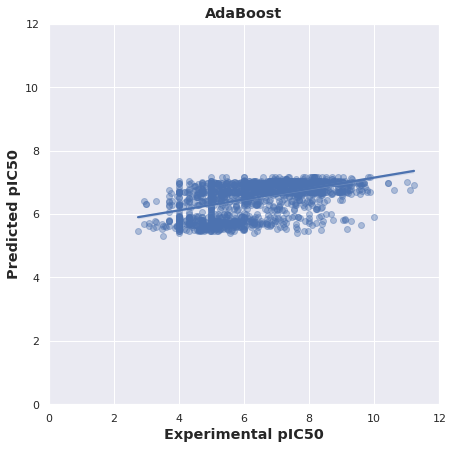

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)


ax = sns.regplot(Y_test, Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(7, 7)
ax.set_title('AdaBoost',fontsize='large', fontweight='bold')
plt.show